# Optimización de Parámetros - XGB

In [1]:
## Get current work directory to load all the custom modules
from pathlib import Path
import os
import sys
BASE_DIR = Path().absolute().resolve(strict=True).parent.parent.parent
if str(BASE_DIR) not in sys.path:
    sys.path.append(str(BASE_DIR))

In [2]:
DATA_PATH = os.path.join(BASE_DIR, 'data', 'autos')
print(DATA_PATH)

/workspace/Externos/TimeSeries/BenchMark/data/autos


In [3]:
import pandas as pd


In [4]:
import optuna
import datetime

In [5]:
from modulos.arima.gruas.general import format_timeseries, show_results_r2, arima_forecasting, total_forecasting, show_optimizer_results
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


from modulos.LR.gruas.generals import make_lags

In [6]:
data = pd.read_csv(os.path.join(DATA_PATH, 'producto.csv'), parse_dates=['Periodo'])
data.head()

,Periodo,idArticulo,ventas,DescProducto
0,2021-10-01,9950,74.0,REFRIGERANTE COOLANT AZUL/NATURAL TRANSP. GAL...
1,2021-09-01,9950,25.0,REFRIGERANTE COOLANT AZUL/NATURAL TRANSP. GAL...
2,2021-08-01,9950,28.0,REFRIGERANTE COOLANT AZUL/NATURAL TRANSP. GAL...
3,2021-07-01,9950,15.0,REFRIGERANTE COOLANT AZUL/NATURAL TRANSP. GAL...
4,2021-06-01,9950,13.0,REFRIGERANTE COOLANT AZUL/NATURAL TRANSP. GAL...


In [7]:
# Pivotando las tablas y llenando de ceros las ventas que no existen.
df_time = format_timeseries(data)
df_time.tail()

idArticulo,551,594,963,1208,1224,1627,3090,3745,3882,3883,...,20263,20301,20305,20310,20697,20769,21577,23900,26158,27165
Periodo,,,,,,,,,,,,,,,,,,,,,
2021-06-01,4.0,3.0,6.0,140.0,0.0,5.0,4.0,5.0,2.0,0.0,...,4.0,6.0,0.0,2.0,2.0,0.0,6.0,104.0,42.0,11.0
2021-07-01,2.0,1.0,14.0,166.0,10.0,17.0,2.0,0.0,1.0,3.0,...,8.0,9.0,4.0,6.0,1.0,3.0,15.0,40.0,17.0,42.0
2021-08-01,8.0,4.0,2.0,520.0,7.0,4.0,11.0,2.0,0.0,4.0,...,48.0,5.0,7.0,7.0,5.0,2.0,33.0,228.0,38.0,12.0
2021-09-01,3.0,10.0,4.0,280.0,2.0,9.0,11.0,8.0,1.0,1.0,...,8.0,8.0,5.0,0.0,10.0,2.0,10.0,84.0,14.0,19.0
2021-10-01,3.0,4.0,3.0,510.0,4.0,3.0,4.0,5.0,0.0,9.0,...,12.0,15.0,25.0,13.0,5.0,3.0,4.0,316.0,9.0,19.0


## Baseline XGB

In [8]:
   
idArticulo = 551

ts = df_time[idArticulo].copy()

# Lag features
n_lags = 5
X = make_lags(ts, n_lags)
# Multistep targets
y = pd.DataFrame({
    'y': ts,
})

y, X = y.align(X, join='inner', axis=0)

data = pd.concat({'Targets': y, 'Features': X}, axis=1)

data.tail(10).style.set_properties(['Targets'], **{'background-color': 'green'}) \
                   .set_properties(['Features'], **{'background-color': 'magenta'})
    

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [10]:
model = XGBRegressor(max_depth=6, gamma=10, n_estimators=2,)


In [11]:
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross validation results r2: {scores.mean()} ")

Cross validation results r2: -0.8079282419258711 


In [12]:
model.fit(X, y)
y_fit = pd.DataFrame(model.predict(X), index=X.index, columns=y.columns)
#y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

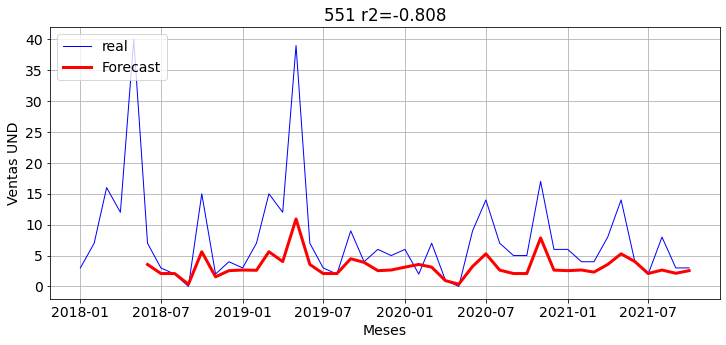

In [13]:
show_results_r2(df_time[[idArticulo]], y_fit,idArticulo, scores.mean() )

